In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

import statsmodels.formula.api as smf

# Read in dataset/s

In [3]:
host_df = pd.read_csv('../Data/MVP_data/562_associated_data/ecoli.combined.tsv',\
                       sep='\t', index_col=0)
print(host_df.shape)
host_df.head()

(4016, 25)


,genome_id,source,type,start,stop,idk,strand,trash,qualifiers,coding_sequence,...,GC_cds,GC_upstream,locus_tag,Gene,prot_abundance,trans_eff_2014,trans_eff_2019,essentiality_ds1,essentiality_ds2,essentiality
0,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,...,0.530654,0.433333,b0002,thrA,317.0,0.98,NaN,Non-essential,Non-essential,Non-essential
1,NC_000913.3,RefSeq,CDS,2801,3733,.,+,0,ID=cds-NP_414544.1;Parent=gene-b0003;Dbxref=Un...,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,...,0.562701,0.500000,b0003,thrB,76.3,0.63,NaN,Non-essential,Non-essential,Non-essential
2,NC_000913.3,RefSeq,CDS,3734,5020,.,+,0,ID=cds-NP_414545.1;Parent=gene-b0004;Dbxref=Un...,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,...,0.528361,0.566667,b0004,thrC,530.0,1.40,NaN,Non-essential,Non-essential,Non-essential
3,NC_000913.3,RefSeq,CDS,5234,5530,.,+,0,ID=cds-NP_414546.1;Parent=gene-b0005;Dbxref=Un...,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,...,0.538721,0.400000,b0005,yaaX,NaN,0.28,NaN,Non-essential,Non-essential,Non-essential
4,NC_000913.3,RefSeq,CDS,5683,6459,.,-,0,ID=cds-NP_414547.1;Parent=gene-b0006;Dbxref=Un...,ATGCTGATTCTTATTTCACCTGCGAAAACGCTTGATTACCAAAGCC...,...,0.496782,0.466667,b0006,yaaA,47.9,2.07,0.410931,Non-essential,Non-essential,Non-essential


In [19]:
rna_df = pd.read_excel('/Users/adamhockenberry/Downloads/41467_2019_13483_MOESM4_ESM.xlsx',
                       sheet_name='Expression Data',
                       index_col=0)
print(rna_df.shape)
rna_df.head()

(3923, 278)


,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,11.006653,11.130196,11.704951,11.888217,11.064810,10.779071,9.976401,10.291135,11.229767,11.214065,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.415654,10.523138,11.423835,11.803781,10.776984,10.597810,9.596833,10.191503,10.897938,10.861157,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.594871,10.725062,10.457270,10.779162,10.394971,10.113950,8.741617,9.082231,10.185151,10.164655,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.316102,6.258499,5.422129,5.336121,6.716069,6.410864,4.626949,4.756153,6.527653,6.136168,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.915771,6.897597,6.775645,6.782605,6.761813,6.816532,6.686767,6.860036,6.862147,6.817480,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213


In [5]:
###Exponentiate the RNA-seq dataset?
rna_df = np.exp(rna_df)-1
rna_df.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,60272.783229,68198.723226,121169.203039,145540.593264,63882.064473,48004.529250,21511.752130,29469.209713,75339.012858,74165.292943,...,28891.207476,29042.949517,69461.222740,71009.118271,117782.592293,123758.699808,144570.487627,150727.716467,98361.064707,104063.028860
b0003,33377.061960,37164.565132,91475.255777,133756.167521,47904.422452,40046.054659,14717.088880,26674.550816,54063.756746,52111.354192,...,25854.811584,24755.926542,30160.511705,32604.993180,55072.629335,54680.315531,61322.836008,62218.660569,41121.102771,47295.677295
b0004,39928.516390,45480.549892,34795.427264,48008.860171,32693.800348,24683.963679,6257.009562,8796.568978,26505.658565,25967.890300,...,35420.308487,34007.029425,43456.610214,45430.131187,69098.968106,67017.284741,72025.895550,76254.502632,57135.925253,59933.427205
b0005,552.411384,521.433922,225.360458,206.705418,824.566062,607.419262,101.201776,115.297646,682.791732,461.278622,...,394.076303,299.541456,546.914997,538.876287,156.360153,124.907826,231.315556,315.698818,354.656004,332.158459
b0006,1007.047765,988.893260,875.244163,881.364195,863.208004,911.813903,800.725762,952.401313,954.416071,912.679846,...,4320.194915,4113.984334,3419.406030,3201.981561,1561.638519,1579.561843,1521.488544,1501.313038,3157.177105,3310.687065


In [20]:
#Set values below some level to NULL
# rna_df[rna_df<=0] = None
rna_df[rna_df<=1.0] = None

# Summarize the RNA-seq dataset and add to larger df

In [21]:
rna_summary_df = pd.DataFrame()
rna_summary_df['zero_counts_TPM'] = rna_df.isna().sum(axis=1)
rna_summary_df['mean_TPM'] = rna_df.mean(axis=1)
rna_summary_df['median_TPM'] = rna_df.median(axis=1)
rna_summary_df['noise_TPM'] = rna_df.std(axis=1)/rna_df.mean(axis=1)
rna_summary_df['stdev_TPM'] = rna_df.std(axis=1)


combined_df = host_df.merge(rna_summary_df[['zero_counts_TPM',
                                            'mean_TPM', 
                                            'median_TPM', 
                                            'noise_TPM', 
                                            'stdev_TPM']],
                            left_on='locus_tag', 
                            right_on='log-TPM', 
                            how='left')
print(combined_df.shape)

(4016, 30)


# Drop certain columns?

In [22]:
print(combined_df.shape)
combined_df = combined_df[combined_df['mean_TPM'].isnull()==False]
print(combined_df.shape)

(4016, 30)
(3728, 30)


In [25]:
temp_df = combined_df[combined_df['prot_abundance'].isnull()==False]
# smf.ols('np.log(prot_abundance) ~ np.log(mean_TPM)', data=temp_df).fit().summary()
# smf.ols('np.log(prot_abundance) ~ mean_TPM', data=temp_df).fit().summary()
# smf.ols('np.log(prot_abundance) ~ np.log(median_TPM)', data=temp_df).fit().summary()

In [26]:
smf.ols('np.log(prot_abundance) ~ np.log(mean_TPM) + aSD_binding + sec_struct', data=temp_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(prot_abundance)   R-squared:                       0.574
Model:                                OLS   Adj. R-squared:                  0.574
Method:                     Least Squares   F-statistic:                     1553.
Date:                    Sat, 22 Aug 2020   Prob (F-statistic):               0.00
Time:                            13:41:21   Log-Likelihood:                -7464.4
No. Observations:                    3462   AIC:                         1.494e+04
Df Residuals:                        3458   BIC:                         1.496e+04
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.3854      0.177    -19.074      0.000      -3.733      -3.037
mean_TPM        1.0136      0.015     66.461      0.000       0.984       1.044
aSD_binding    -0.1949      0.017    -11.779      0.000      -0.227      -0.162
sec_struct      0.0811      0.007     11.223      0.000       0.067       0.095
==============================================================================
Omnibus:                      197.604   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.722
Skew:                          -0.511   Prob(JB):                     4.94e-61
Kurtosis:                       3.939   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Split off noisy / less noisy genes

In [27]:
low_noise_thresh = combined_df['noise_TPM'].quantile(0.25)
high_noise_thresh = combined_df['noise_TPM'].quantile(0.75)
print(low_noise_thresh, high_noise_thresh)

0.07802063248867898 0.2547409981543883


In [28]:
temp_df = combined_df[combined_df['prot_abundance'].isnull() == False]
temp_df['high_variance'] = 100
temp_df.at[temp_df[temp_df['noise_TPM'] <= low_noise_thresh].index,'high_variance'] = 0
temp_df.at[temp_df[temp_df['noise_TPM'] >= high_noise_thresh].index, 'high_variance'] = 1
temp_df = temp_df[temp_df['high_variance'] != 100] 
print(temp_df.shape)

(1705, 31)


/Users/adamhockenberry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/adamhockenberry/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


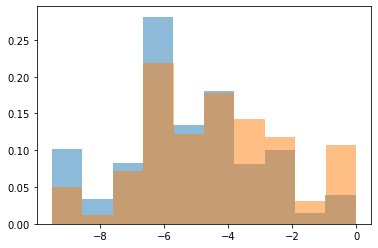

In [31]:
col_name = 'aSD_binding'
fig, ax = plt.subplots()
ax.hist(temp_df[temp_df['high_variance'] == 1][col_name], density=True, alpha=0.5);
ax.hist(temp_df[temp_df['high_variance'] == 0][col_name], density=True, alpha=0.5);

In [32]:
print(temp_df[temp_df['high_variance'] == 1][col_name].shape)
print(temp_df[temp_df['high_variance'] == 0][col_name].shape)
print(temp_df[temp_df['high_variance'] == 1][col_name].mean())
print(temp_df[temp_df['high_variance'] == 0][col_name].mean())
print(stats.ttest_ind(temp_df[temp_df['high_variance'] == 1][col_name], 
                      temp_df[temp_df['high_variance'] == 0][col_name], equal_var=False))

(774,)
(931,)
-5.29501291989662
-4.433501611170769
Ttest_indResult(statistic=-8.20102361676343, pvalue=4.694544383174935e-16)


In [ ]:
smf.logit('high_variance ~ np.log(mean_TPM) + aSD_binding + sec_struct', data=temp_df).fit().summary()